In [9]:
import tensorflow as tf

import cv2
from numpy import random
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_one_box(x, img, color=None, label=None, line_thickness=3, ratio=None):
    if ratio is not None:
        x = x[0]*ratio[0], x[1]*ratio[1], x[2]*ratio[0], x[3]*ratio[1]
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)


In [7]:
model = tf.saved_model.load('weights/tf')

In [18]:
%%time
img = cv2.imread('horses.jpg').astype('float')
img_size = 640
img = cv2.resize(img, (img_size, img_size))
img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
img = np.ascontiguousarray(img)
img /= 255.0  # 0 - 255 to 0.0 - 1.0
if len(img.shape) == 3:
    img = np.expand_dims(img, axis=0)
img_t = tf.cast(tf.convert_to_tensor(img), dtype=tf.float32)
out = model(images=img_t)
out = out['output'].numpy()

CPU times: user 658 ms, sys: 170 ms, total: 828 ms
Wall time: 290 ms


In [10]:
with open('names.pickle', 'rb') as f:
    names = pickle.load(f)
colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

In [25]:
%time
im0 = cv2.imread('horses.jpg')[:,:,::-1] / 1.
ratio = (im0.shape[1]/img_size, im0.shape[0]/img_size)
for _, *xyxy, conf, cls in out:
    label = f'{names[int(cls)]} {conf:.2f}'
    plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=3, ratio=ratio)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


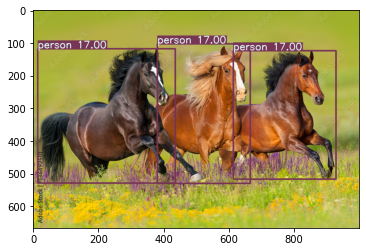

In [26]:
plt.imshow(im0.astype('uint8'))

In [27]:
out

array([[  0.       , 244.36475  ,  98.98111  , 426.69116  , 509.31052  ,
         17.       ,   0.7657863],
       [  0.       , 393.51065  , 119.90399  , 594.95667  , 496.57776  ,
         17.       ,   0.7180128],
       [  0.       ,   9.3480835, 114.10362  , 279.22348  , 507.62793  ,
         17.       ,   0.6417461]], dtype=float32)